In [1]:
!pip install dmba

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from dmba import classificationSummary




In [40]:

import pandas as pd
train_df = pd.read_csv('/content/train.csv')
print(train_df.head())


   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

In [41]:
# prompt: print unique values in object colums

for col in train_df.columns:
  print(f'{col}: {train_df[col].unique()}')

Employee ID: [ 8410 64756 30257 ... 54887   861 15796]
Age: [31 59 24 36 56 38 47 48 57 30 29 40 19 33 49 51 39 54 23 45 42 53 37 34
 25 41 55 21 28 26 52 50 27 58 43 35 46 44 20 18 22 32]
Gender: ['Male' 'Female']
Years at Company: [19  4 10  7 41  3 23 16 44  1 12  6 38 22 30  9 37 33 13  5 21 32 34 11
  2 18 27 17 36  8 28 35 14 24 40 15 45 39 20 43 26 29 46 42 25 31 47 48
 49 50 51]
Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Monthly Income: [ 5390  5534  8159 ... 12440  2975 12260]
Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
Performance Rating: ['Average' 'Low' 'High' 'Below Average']
Number of Promotions: [2 3 0 1 4]
Overtime: ['No' 'Yes']
Distance from Home: [22 21 11 27 71 37 75  5 39 57 51 26 78 30 98 48 17 86 60 10 18 95 23 16
 63 92 58 55 31 32 82  8 74  3 76 47 67 84 14 36 79 52 44 89 64  7 87 24
 15 81 13 35 68 56 73 41 34 29 19 50 62 49 69 33 61 53 72 91 65 93 28 46
 54  9 45 96 94  1 

In [42]:

print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [43]:


for col in train_df.columns:
  print(f'{col}: {train_df[col].nunique()}')

Employee ID: 59598
Age: 42
Gender: 2
Years at Company: 51
Job Role: 5
Monthly Income: 9569
Work-Life Balance: 4
Job Satisfaction: 4
Performance Rating: 4
Number of Promotions: 5
Overtime: 2
Distance from Home: 99
Education Level: 5
Marital Status: 3
Number of Dependents: 7
Job Level: 3
Company Size: 3
Company Tenure: 127
Remote Work: 2
Leadership Opportunities: 2
Innovation Opportunities: 2
Company Reputation: 4
Employee Recognition: 4
Attrition: 2


In [44]:

train_df = train_df.drop(['Employee ID','Company Tenure'], axis=1)



In [45]:
for col in train_df.columns:
  print(f'{col}: {train_df[col].nunique()}')
train_df.columns = [col.replace(' ', '_') for col in train_df.columns]

Age: 42
Gender: 2
Years at Company: 51
Job Role: 5
Monthly Income: 9569
Work-Life Balance: 4
Job Satisfaction: 4
Performance Rating: 4
Number of Promotions: 5
Overtime: 2
Distance from Home: 99
Education Level: 5
Marital Status: 3
Number of Dependents: 7
Job Level: 3
Company Size: 3
Remote Work: 2
Leadership Opportunities: 2
Innovation Opportunities: 2
Company Reputation: 4
Employee Recognition: 4
Attrition: 2


In [46]:
# prompt: normalize company tenure and monthly income columns with standed scalar

from sklearn.preprocessing import StandardScaler

# Assuming 'train_df' is already loaded as in the previous code

# Select the columns to normalize
columns_to_normalize = [ 'Monthly_Income','Distance_from_Home','Years_at_Company','Age']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

In [47]:
train_df.columns


Index(['Age', 'Gender', 'Years_at_Company', 'Job_Role', 'Monthly_Income',
       'Work-Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Number_of_Promotions', 'Overtime', 'Distance_from_Home',
       'Education_Level', 'Marital_Status', 'Number_of_Dependents',
       'Job_Level', 'Company_Size', 'Remote_Work', 'Leadership_Opportunities',
       'Innovation_Opportunities', 'Company_Reputation',
       'Employee_Recognition', 'Attrition'],
      dtype='object')

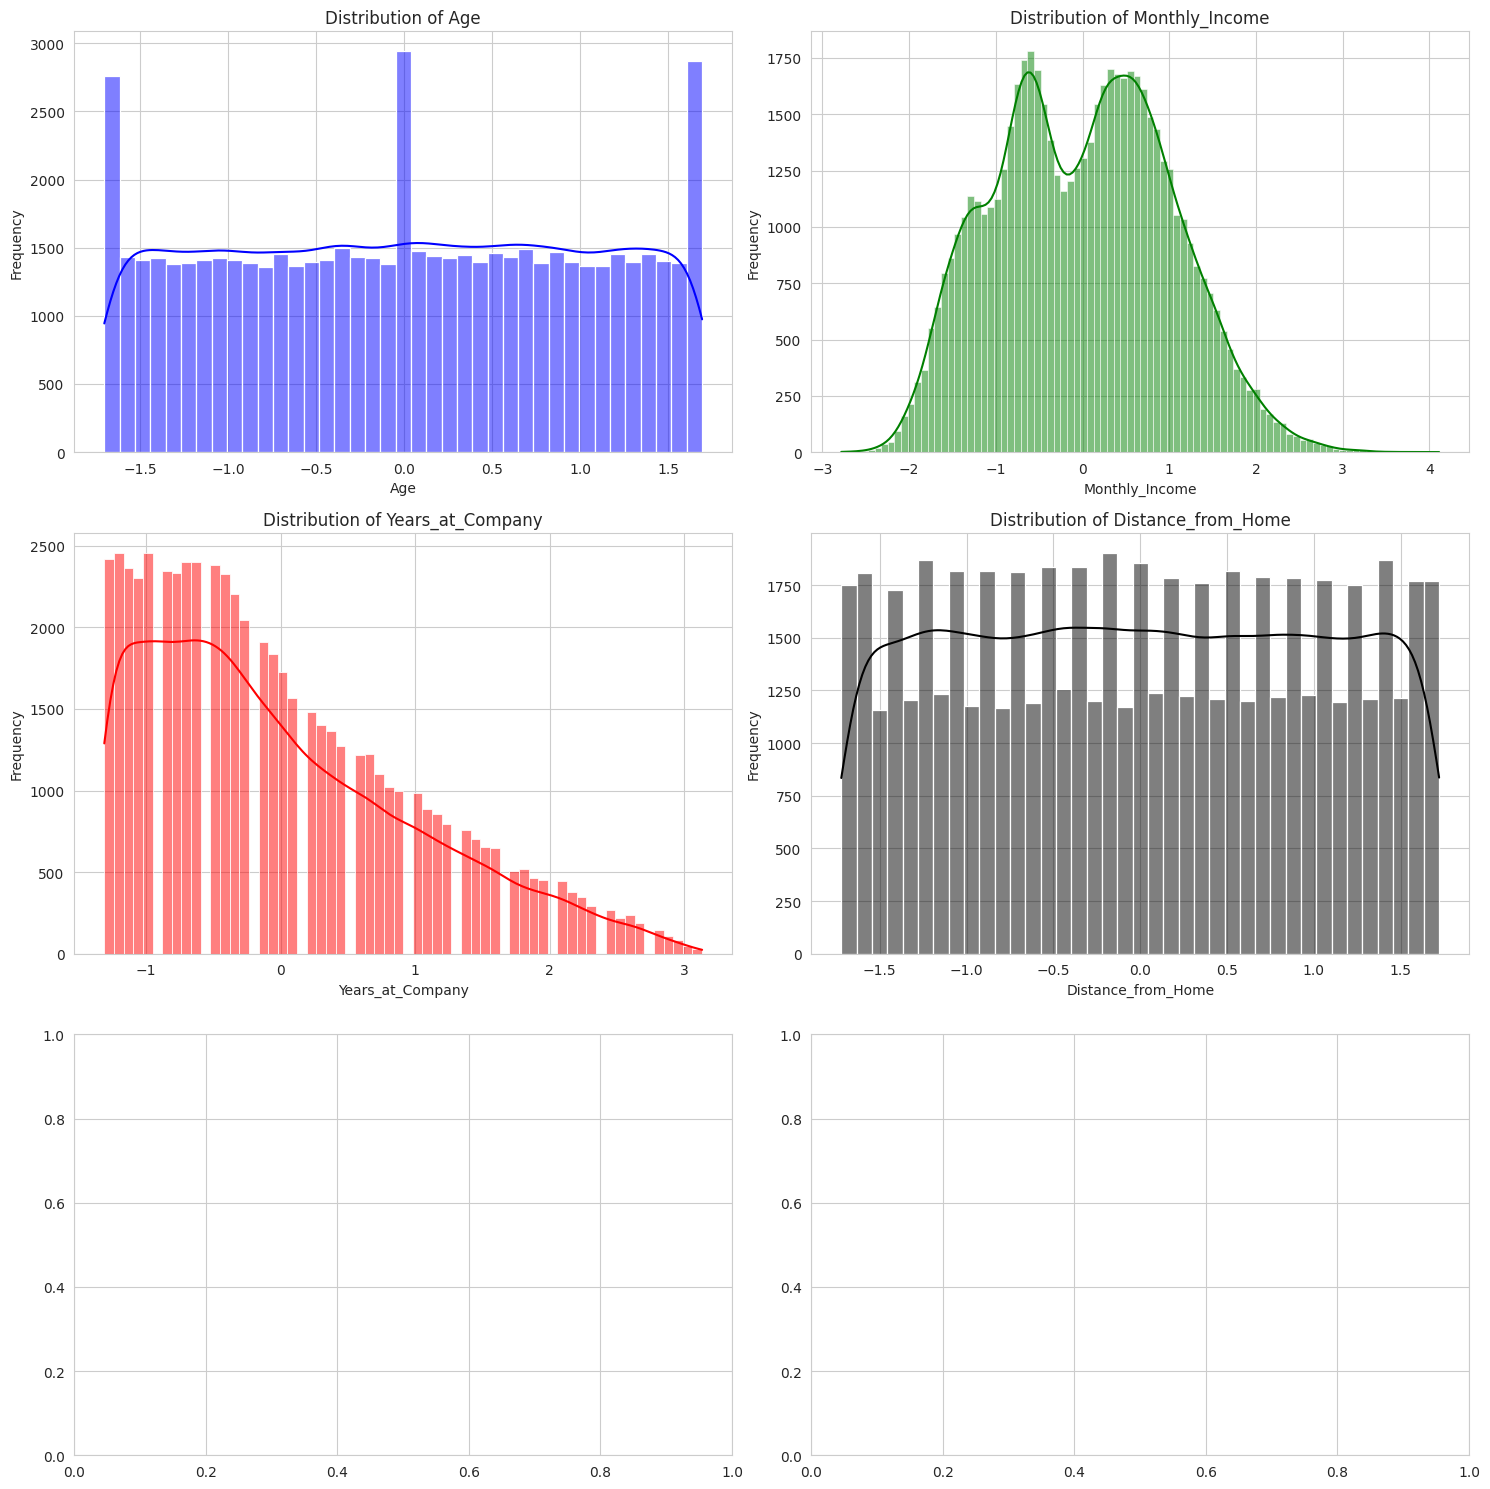

In [79]:
# prompt: plot Histograms: Useful for showing the distribution of numerical variables such as 'Age', 'Monthly Income', 'Years at Company', 'Distance from Home', and 'Company Tenure'.use different colors

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is already loaded and preprocessed as in the previous code

# Select numerical columns for histogram plotting
numerical_cols = ['Age', 'Monthly_Income', 'Years_at_Company', 'Distance_from_Home']

# Set the style for the plot
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Define a list of colors for the histograms
colors = ['blue', 'green', 'red',  'black']

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
  sns.histplot(train_df[col], ax=axes[i], kde=True, color=colors[i])
  axes[i].set_title(f'Distribution of {col}', fontsize=12)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

These graphs are plotted to analyze the distribution of numerical variables and to detect any skewness or anomalies. It has been observed that the distribution of "Years at Company" is left-skewed; therefore, it would be beneficial to explore different normalization methods to adjust this skewness or we can drop this column by checking importance of the feature or ploting heatmap

<ipython-input-49-f826ba0b7136>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=train_df, ax=axes[i], palette='Set2')
<ipython-input-49-f826ba0b7136>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=train_df, ax=axes[i], palette='Set2')
<ipython-input-49-f826ba0b7136>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=train_df, ax=axes[i], palette='Set2')
<ipython-input-49-f826ba0b7136>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

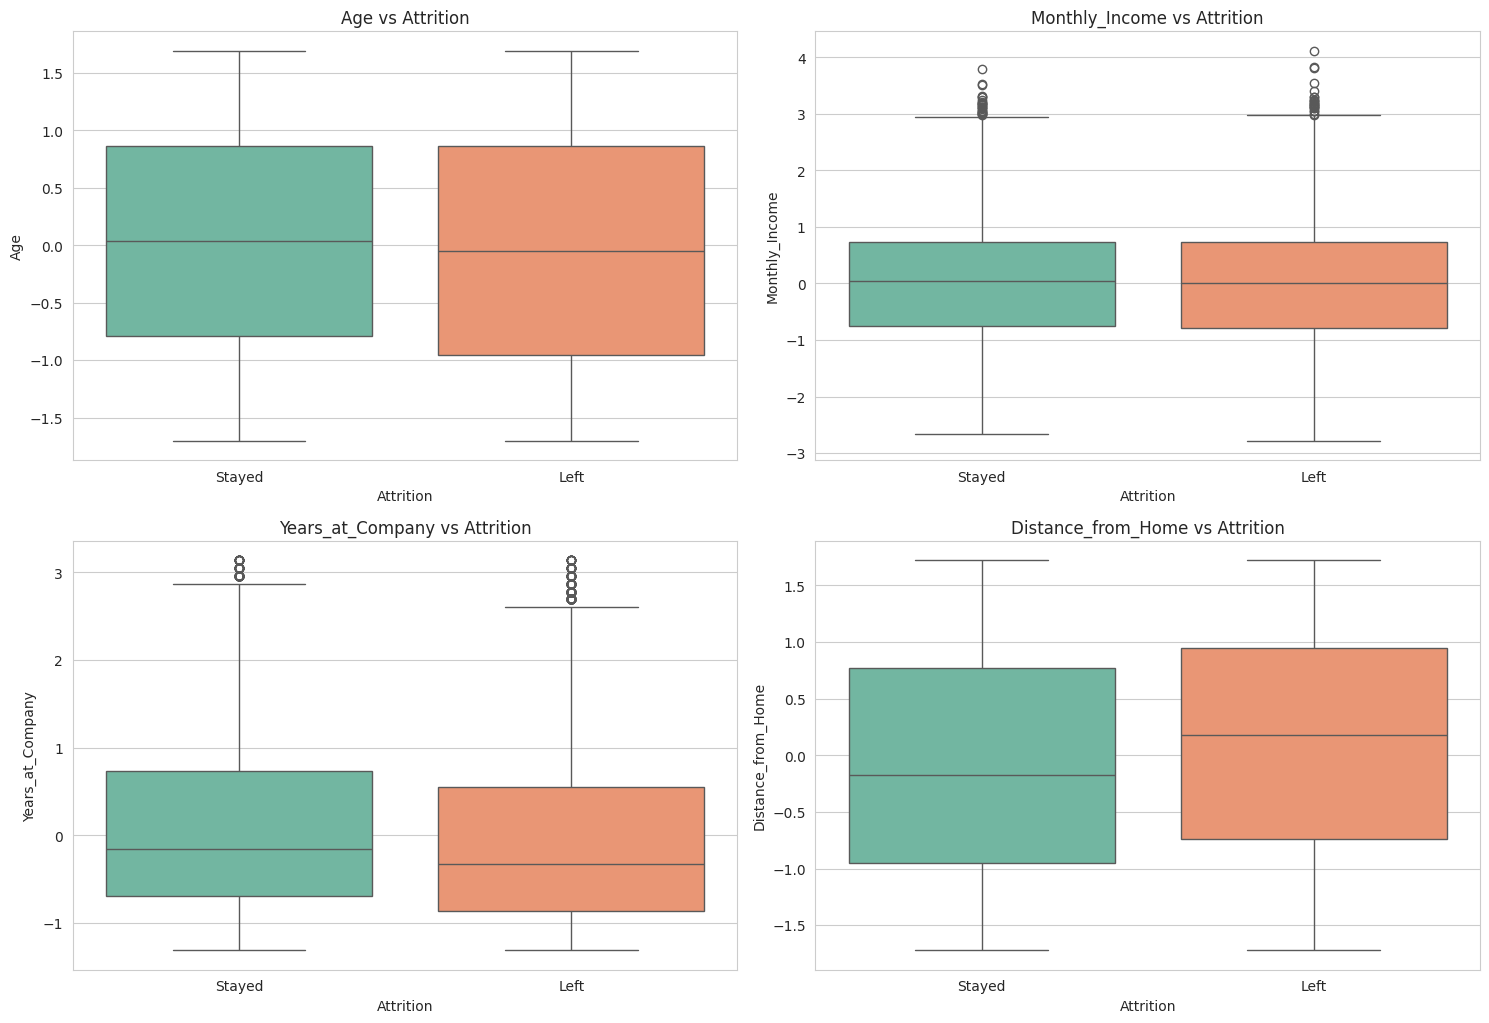

In [49]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Loop through numerical columns and create box plots comparing with Attrition
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Attrition', y=col, data=train_df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Attrition', fontsize=12)
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


**Age vs Attrition:**

Older employees tend to stay with the company more than younger employees, as shown by the higher median age of those who stayed versus those who left.

**Monthly Income vs Attrition:**

Employees who left generally had lower monthly incomes compared to those who stayed, indicated by the lower median income for those who left.

**Years at Company vs Attrition:**

Employees who have been with the company longer are less likely to leave. The median years at the company are higher for those who stayed compared to those who left.

**Distance from Home vs Attrition:**

Distance from home does not show a significant difference between those who stayed and those who left, as the medians are quite close, suggesting distance from home may not be a strong factor in deciding whether to leave or stay.


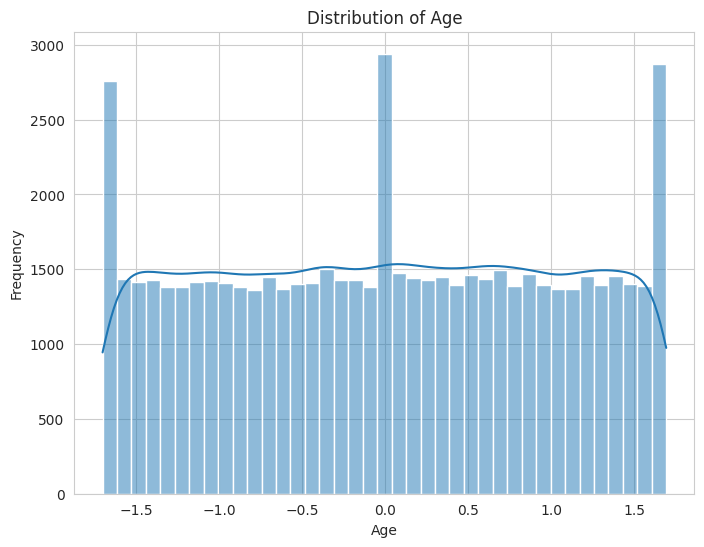

In [50]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows that there are more people around the ages of 20, 40, and 60. Apart from these spikes, the number of people in other age groups from 25 to 55 is fairly even. This suggests that middle-aged individuals are well represented in this dataset

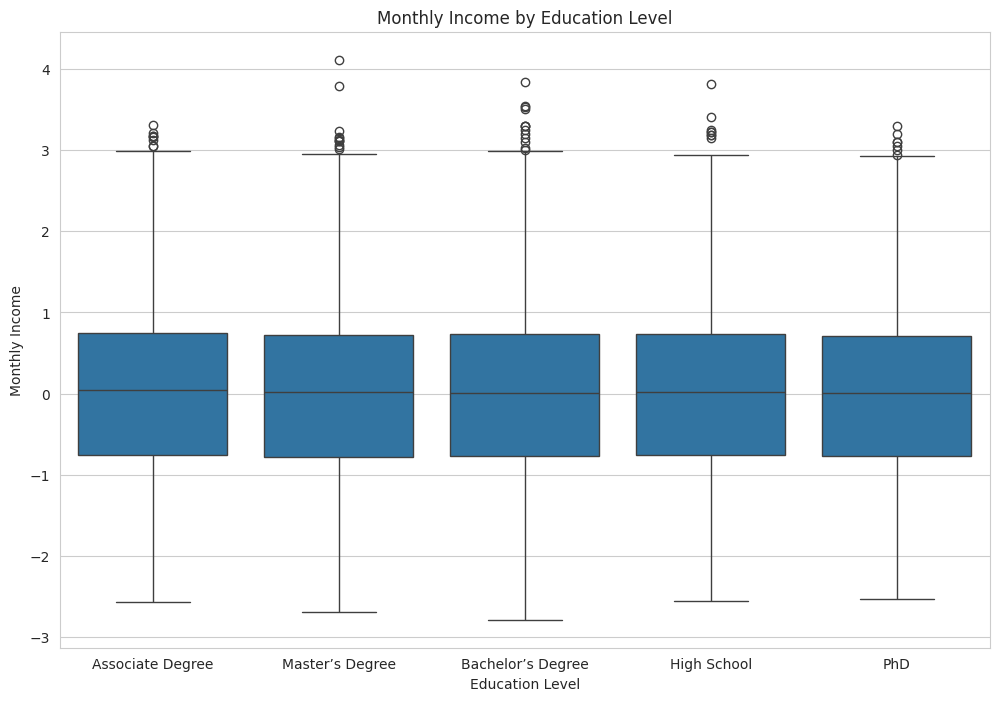

In [51]:
import seaborn as sns

# Box plot for 'Monthly Income' by 'Education Level'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education_Level', y='Monthly_Income', data=train_df)
plt.title('Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.show()


Median Income: The median income is similar across all education levels, suggesting that education does not have a strong impact on median monthly income within this dataset.

Variability: There is noticeable variability in income within each education level, particularly for those with an Associate Degree and PhD, indicating a wider range of incomes among these groups.

Outliers: All education levels have numerous high outliers, highlighting that there are individuals with significantly higher incomes than typical within each category, regardless of their education level.

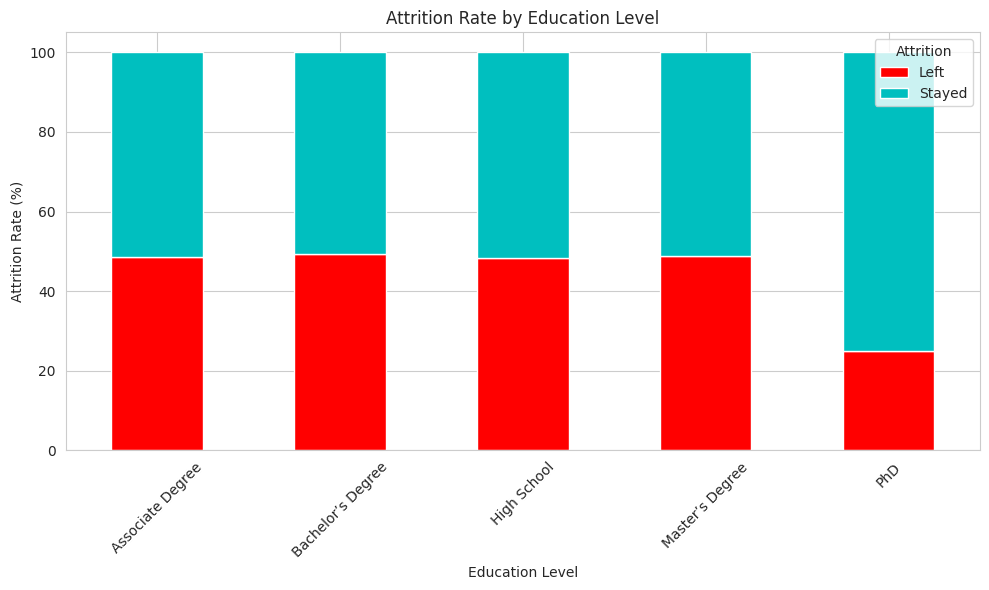

In [52]:


# Calculate the attrition rate for each education level
education_attrition = train_df.groupby('Education_Level')['Attrition'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart

education_attrition.plot(kind='bar', stacked=True, figsize=(10, 6),color=['red', 'c'])
plt.title('Attrition Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

Attrition Proportions:

The proportion of employees who have stayed (green area) is considerably higher across all education levels compared to those who have left (red area).
Education Impact:

**PhD** These groups show the highest proportion of employees who have stayed, with more than 60% retention.\
Bachelor’s Degree, High School, and Master's Degree, Associate Degree These categories show slightly lower retention rates, but still, a majority have stayed, with around 50-60% retention.


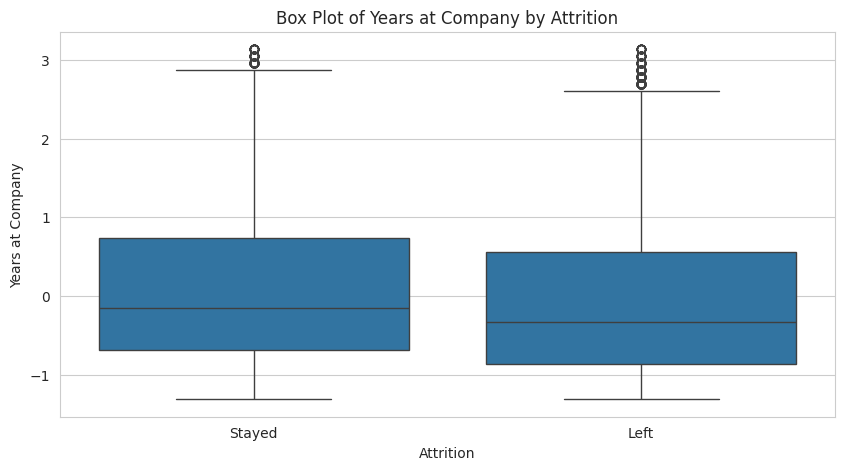

In [53]:




# Box Plot for Years at Company vs. Attrition
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='Years_at_Company', data=train_df)
plt.title('Box Plot of Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()



The box plot shows how long employees have worked at the company, comparing those who stayed with those who left. Here are the observations:

**Similar Median Tenure:** Both groups, those who stayed and those who left, have about the same median number of years at the company.

**Less Variation Among Stayers:** Employees who stayed with the company have less variation in how long they've been there compared to those who left.

**More Outliers Among Leavers:** There are a few cases where employees who left had been with the company much longer than most others.

This suggests that, on average, the length of time someone stays at the company does not vary much between those who stay and those who leave, but those who leave tend to have a wider range of tenures

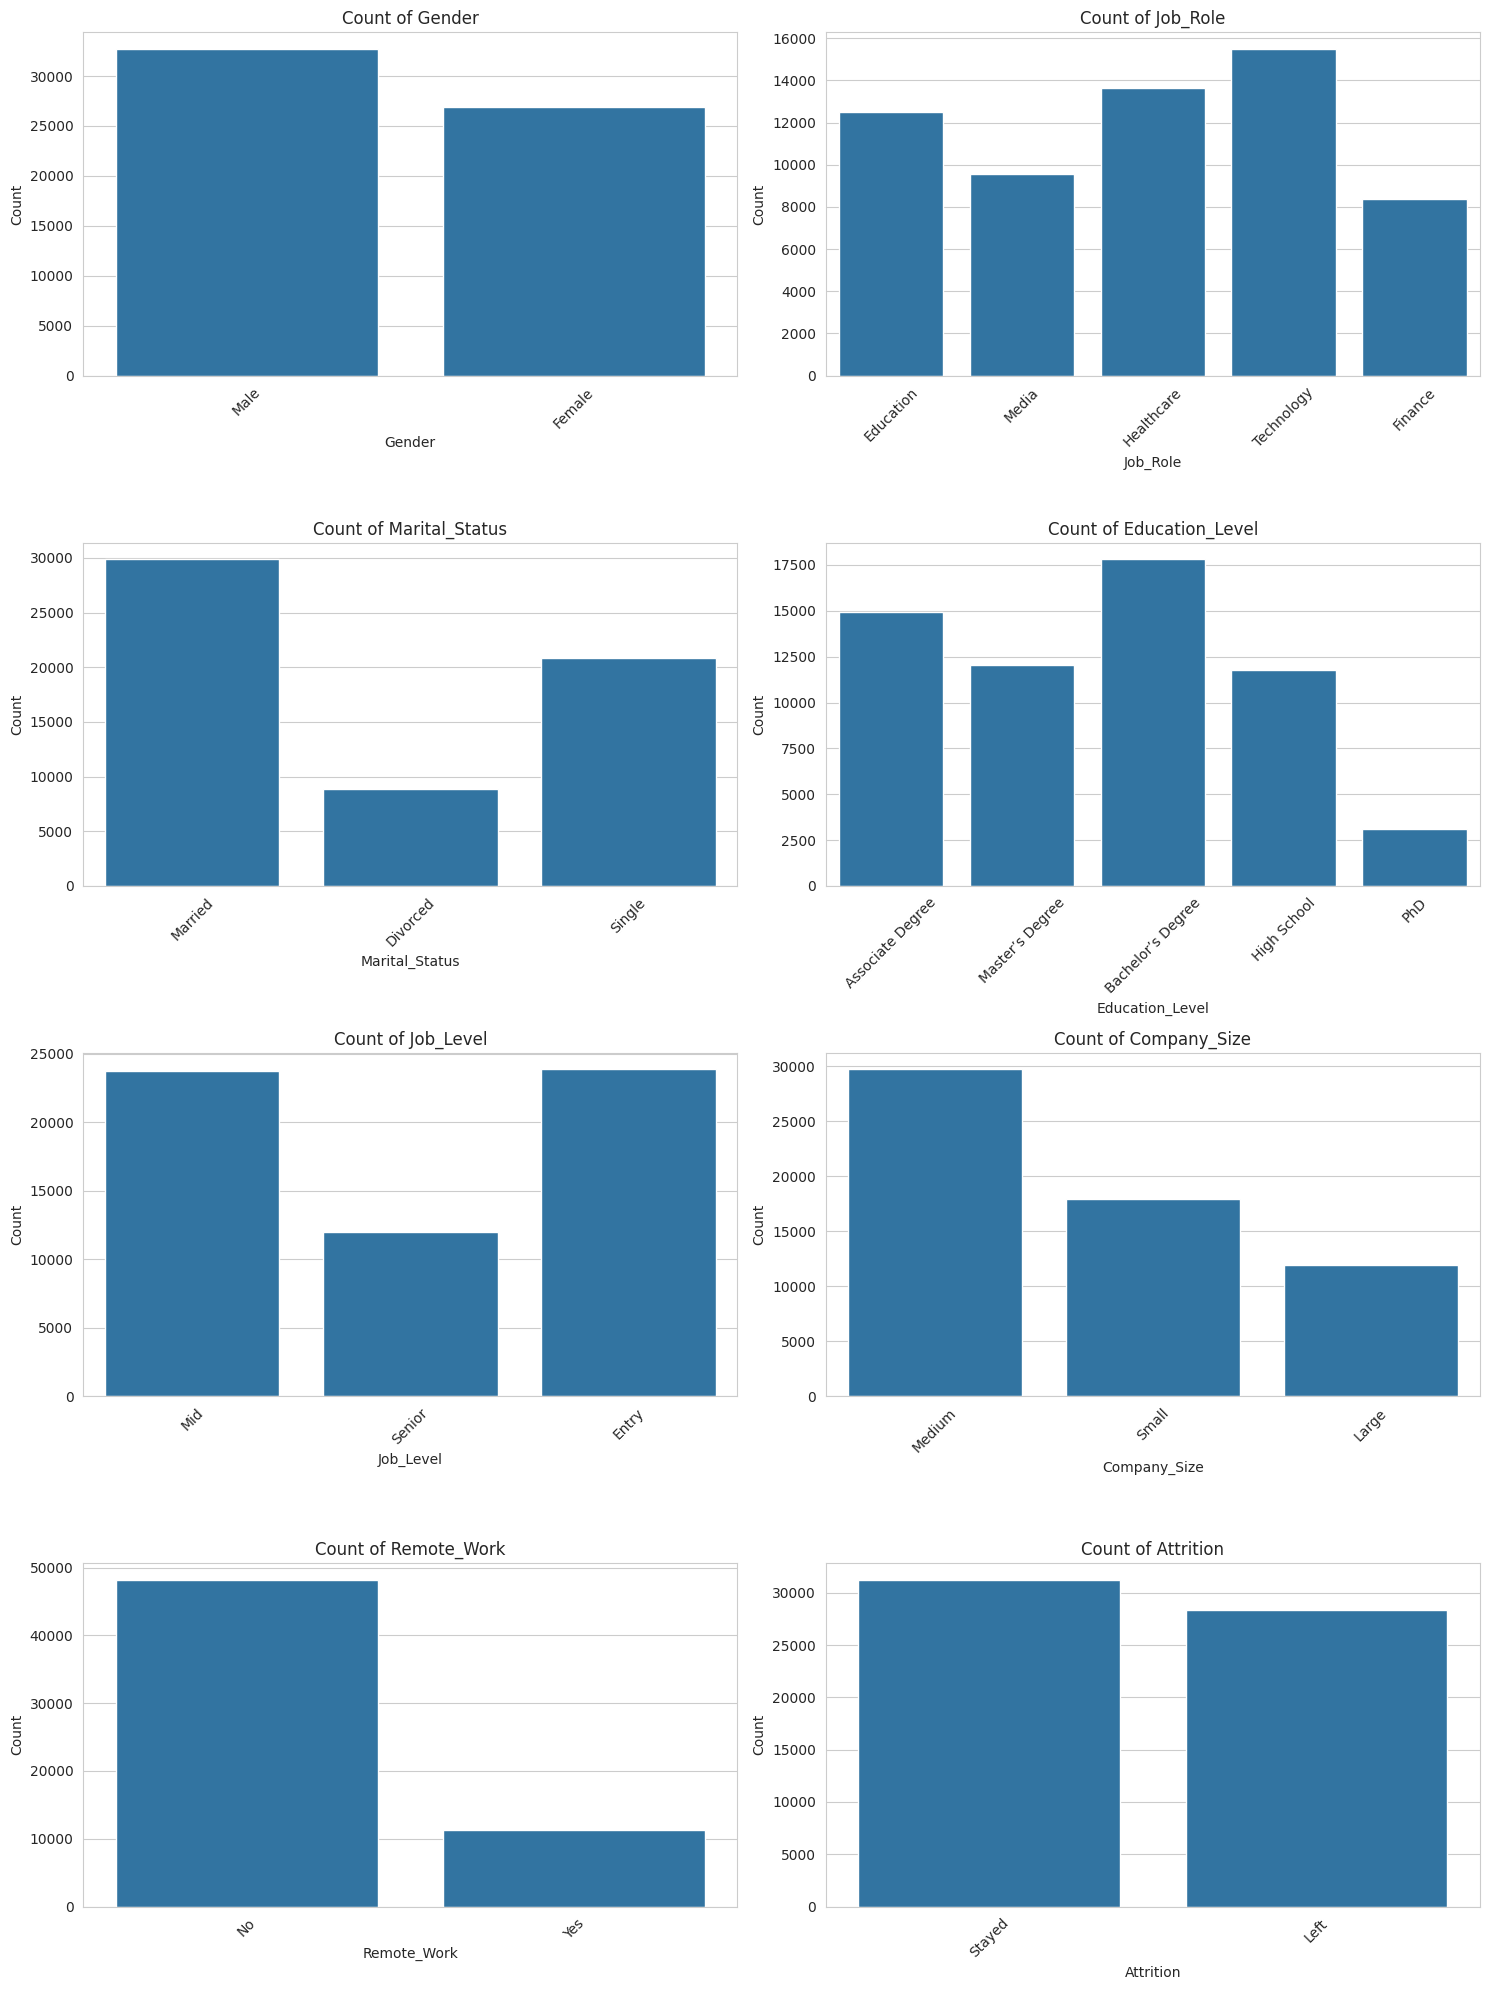

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is already loaded and preprocessed as in the previous code

categorical_cols = ['Gender', 'Job_Role', 'Marital_Status', 'Education_Level', 'Job_Level', 'Company_Size', 'Remote_Work', 'Attrition']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Define a list of colors for the bar charts
#colors = ['blue', 'salmon', 'lightgreen', 'gold', 'plum', 'lightcoral', 'khaki', 'teal']

# Loop through categorical columns and plot countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=train_df, ax=axes[i])  # Use modulo for color cycling
    axes[i].set_title(f'Count of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability


# Adjust layout and display plot
plt.tight_layout()
plt.show()

Above bar charts displaying counts across various categorical variables and their observations:

**Gender Distribution:** There are more males than females represented in the dataset.

**Job Role:** The most common job roles are 'Media' and 'Education', while 'Finance' is the least common.

**Marital Status:** 'Married' is the most common marital status, followed by 'Single' and then 'Divorced'.

**Education Level:** 'Bachelor’s Degree' is the most prevalent education level, followed closely by 'Master’s Degree'. 'PhD' holders are the least represented.

**Job Level:** 'Mid' level positions are the most common, with fewer 'Senior' and 'Entry' level positions.

**Company Size:** 'Medium' sized companies dominate the dataset, with fewer employees in 'Small' and 'Large' companies.

**Remote Work:** The vast majority of employees do not work remotely.

**Attrition:** There are slightly more employees who have stayed with the company compared to those who have left.

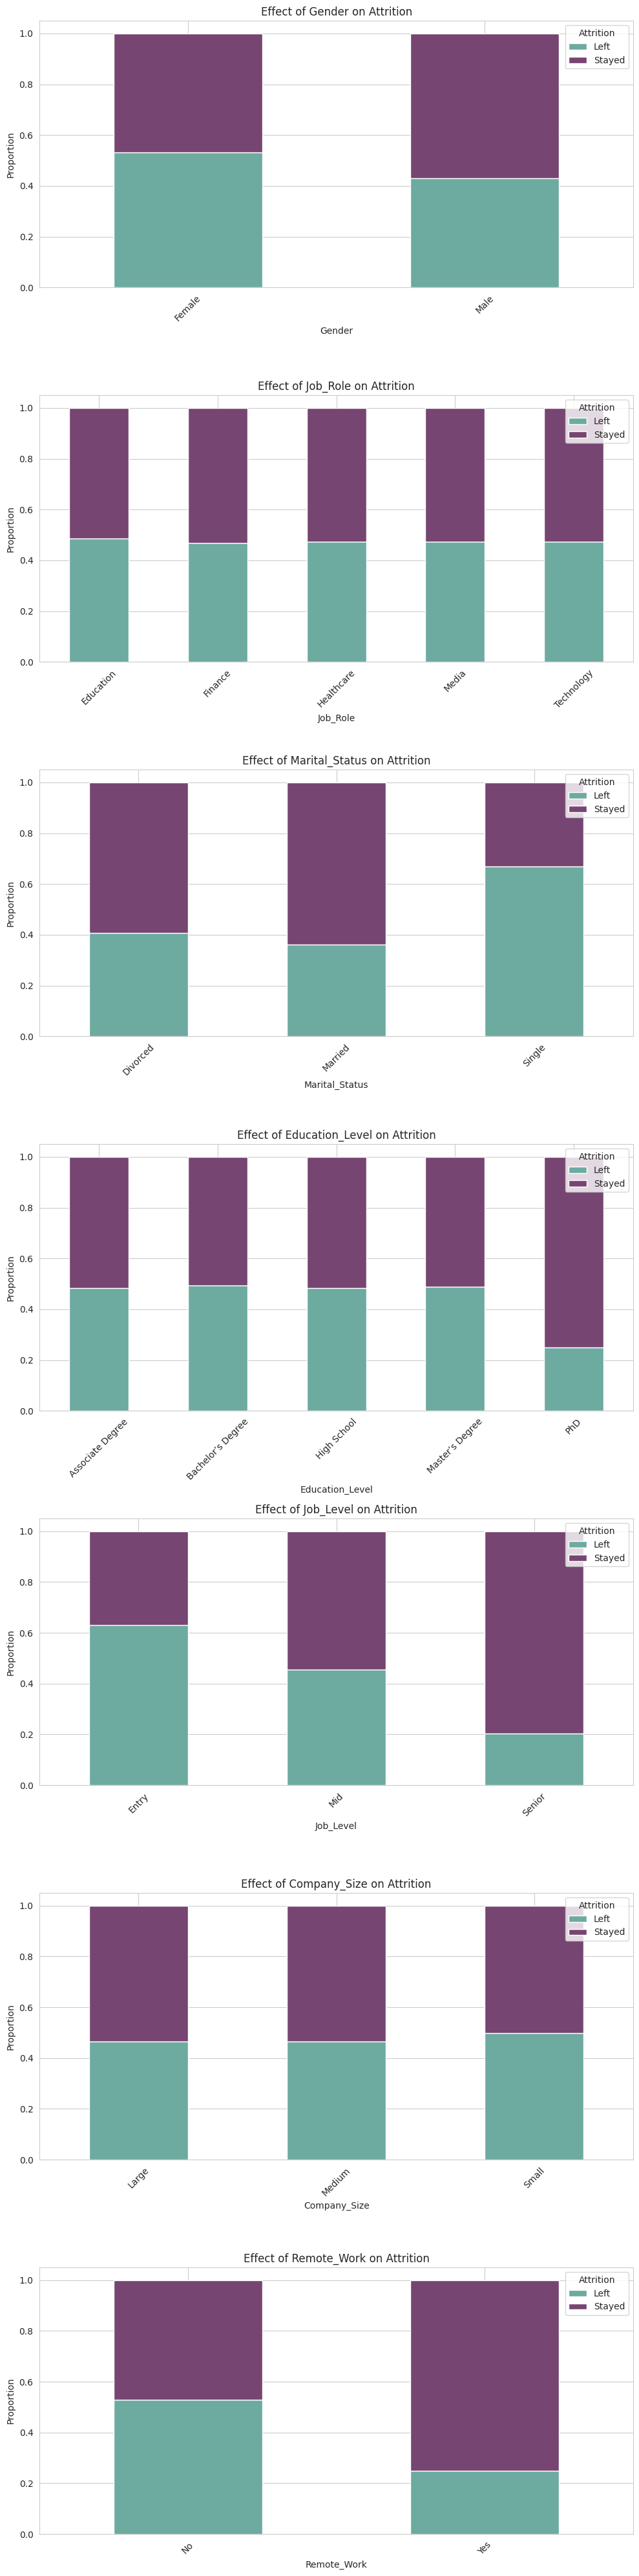

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'train_df' is already loaded and preprocessed as in the previous code

categorical_cols = ['Gender', 'Job_Role', 'Marital_Status', 'Education_Level', 'Job_Level', 'Company_Size', 'Remote_Work']
target_col = 'Attrition'

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 40))  # Adjust figure size as needed

# Loop through categorical columns and create stacked bar charts
for i, col in enumerate(categorical_cols):
    # Create a crosstab to count occurrences of each combination
    crosstab = pd.crosstab(train_df[col], train_df[target_col], normalize='index')

    # Create the bar chart
    crosstab.plot(kind='bar', stacked=True, color=['#6daa9f', '#774571'], ax=axes[i])  # Adjust color as necessary
    axes[i].set_title(f'Effect of {col} on {target_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()


To consider how many people are in each category and the rates of staying or leaving within those groups. This stacked bar charts will help us understand the impact of different factors on employee attirition better

**Gender:**

Both males and females show significant numbers in the dataset. The difference in attrition rates might be less impactful when considering absolute numbers, indicating that while there are differences, both genders are well-represented.

**Job Role:**

Job roles like 'Education' and 'Health' appear to have lower volumes but show higher retention rates. In contrast, 'Media' and 'Finance' roles, possibly having higher numbers, show greater attrition. This suggests that roles which might be more demanding or high-stress tend to have higher turnover.

**Marital Status:**

Single employees, who potentially constitute a larger portion of the dataset, show higher attrition rates compared to their married or divorced counterparts. The volume of single employees significantly influences the overall attrition rate observed in the dataset.

**Education Level:**

The highest numbers seem to be in categories with lower educational qualifications, like 'High School' and 'Bachelor's Degree', with corresponding higher attrition rates. In contrast, fewer employees with a 'PhD', who show much lower attrition rates, suggest that higher education may be correlated with better retention but is less common.

**Job Level:**

Entry-level positions are likely the most correspond with the highest attrition rates. This implies that as employees gain more experience or move up in their job levels, they are less likely to leave, reflecting a typical career growth and retention pattern.

**Company Size:**

Small companies might have fewer employees but show higher attrition rates, suggesting possible challenges like fewer growth opportunities or benefits compared to larger companies, which show better retention rates and likely have a higher number of employees.

**Remote Work:**

The ability to work remotely seems to be less common but significantly impacts retention, where employees with the option to work remotely show much lower attrition. This category’s lower volume but strong retention impact highlights the value of remote work in employee satisfaction and retention.


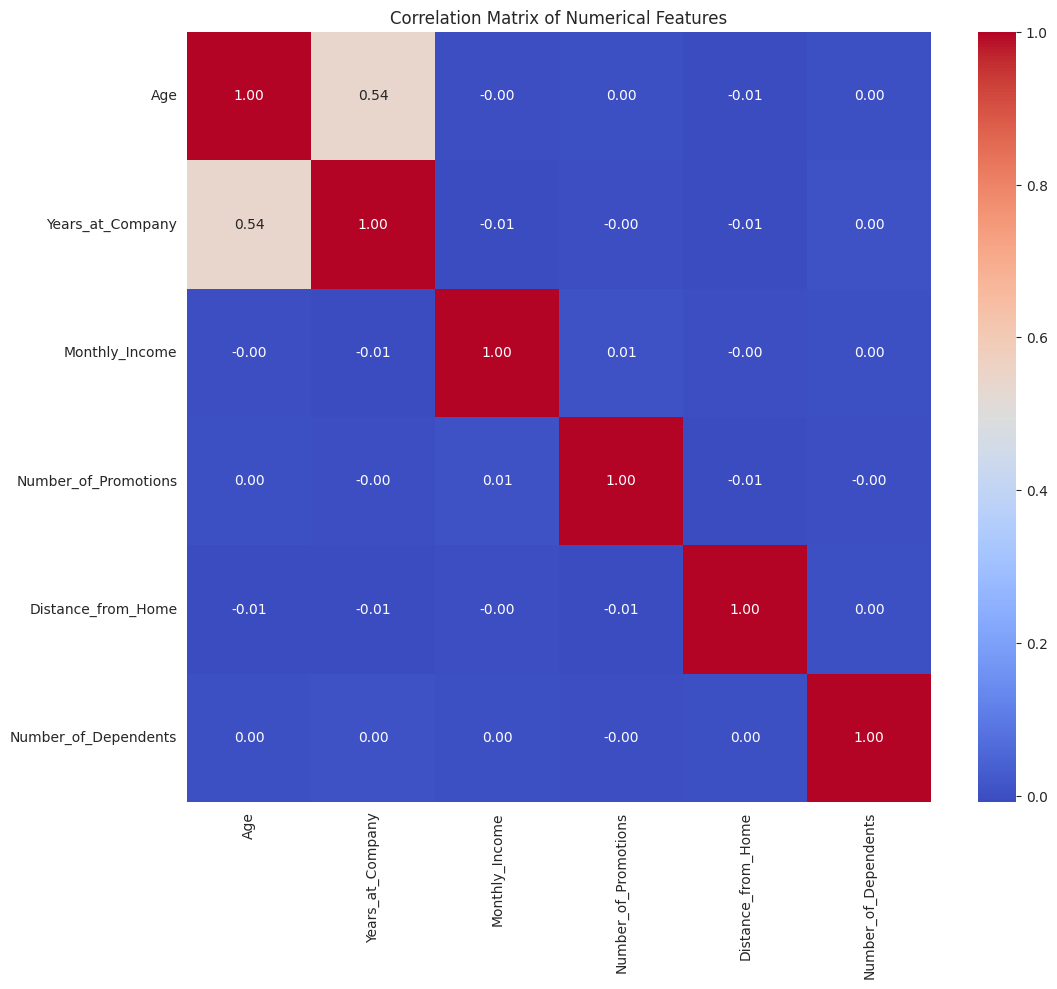

In [56]:

correlation_matrix = train_df.corr(numeric_only=True)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix reveals a moderate positive correlation (0.54) between age and years at the company, suggesting that as employees age, they tend to have longer tenures at the company. Other variables such as monthly income, number of promotions, distance from home, and number of dependents show very little to no correlation with each other, indicating their effects are largely independent within this dataset

# Encoding part


In [57]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create dummy variables for 'Job_Role', 'Education_Level', and 'Marital_Status'
train_df = pd.get_dummies(train_df, columns=['Job_Role', 'Education_Level', 'Marital_Status'], drop_first=True)


# Initialize LabelEncoder
label_encoders = {}
for column in ['Gender', 'Job_Level', 'Company_Size', 'Remote_Work', 'Attrition','Work-Life_Balance','Job_Satisfaction','Performance_Rating','Overtime'
                ,'Company_Reputation','Employee_Recognition']:
  le = LabelEncoder()
  train_df[column] = le.fit_transform(train_df[column])
  label_encoders[column] = le

# Print the mapping for each label encoded column
for col, le in label_encoders.items():
  print(f"Label Encoding for {col}:")
  for i, class_name in enumerate(le.classes_):
    print(f"  {class_name} -> {i}")

Label Encoding for Gender:
  Female -> 0
  Male -> 1
Label Encoding for Job_Level:
  Entry -> 0
  Mid -> 1
  Senior -> 2
Label Encoding for Company_Size:
  Large -> 0
  Medium -> 1
  Small -> 2
Label Encoding for Remote_Work:
  No -> 0
  Yes -> 1
Label Encoding for Attrition:
  Left -> 0
  Stayed -> 1
Label Encoding for Work-Life_Balance:
  Excellent -> 0
  Fair -> 1
  Good -> 2
  Poor -> 3
Label Encoding for Job_Satisfaction:
  High -> 0
  Low -> 1
  Medium -> 2
  Very High -> 3
Label Encoding for Performance_Rating:
  Average -> 0
  Below Average -> 1
  High -> 2
  Low -> 3
Label Encoding for Overtime:
  No -> 0
  Yes -> 1
Label Encoding for Company_Reputation:
  Excellent -> 0
  Fair -> 1
  Good -> 2
  Poor -> 3
Label Encoding for Employee_Recognition:
  High -> 0
  Low -> 1
  Medium -> 2
  Very High -> 3


In [58]:

for col in train_df.select_dtypes(include=['bool']).columns:
    train_df[col] = train_df[col].astype(int)

In [59]:
train_df

,Age,Gender,Years_at_Company,Monthly_Income,Work-Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,Overtime,Distance_from_Home,...,Job_Role_Finance,Job_Role_Healthcare,Job_Role_Media,Job_Role_Technology,Education_Level_Bachelor’s Degree,Education_Level_High School,Education_Level_Master’s Degree,Education_Level_PhD,Marital_Status_Married,Marital_Status_Single
0,-0.626336,1,0.288648,-0.888892,0,2,0,2,0,-0.983891,...,0,0,0,0,0,0,0,0,1,0
1,1.691627,0,-1.045173,-0.821960,3,0,3,3,0,-1.019020,...,0,0,1,0,0,0,1,0,0,0
2,-1.205827,0,-0.511645,0.398153,2,0,3,0,0,-1.370314,...,0,1,0,0,1,0,0,0,1,0
3,-0.212414,0,-0.778409,-1.540084,2,0,2,1,0,-0.808244,...,0,0,0,0,0,1,0,0,0,1
4,1.443273,1,2.244918,-1.153366,1,3,0,0,1,0.737448,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,0.946567,0,-0.333802,-1.342542,1,0,0,1,1,0.561801,...,0,0,0,0,1,0,0,0,0,1
59594,-1.702533,1,-1.045173,0.342841,1,0,2,3,0,-0.281304,...,0,1,0,0,0,0,0,0,0,1
59595,-1.371396,0,-0.155959,0.298220,1,0,2,0,1,-0.562338,...,0,0,0,1,0,0,1,0,1,0
59596,-1.288611,1,-0.689488,-2.031848,1,3,0,0,0,0.421283,...,0,0,0,0,1,0,0,0,0,1


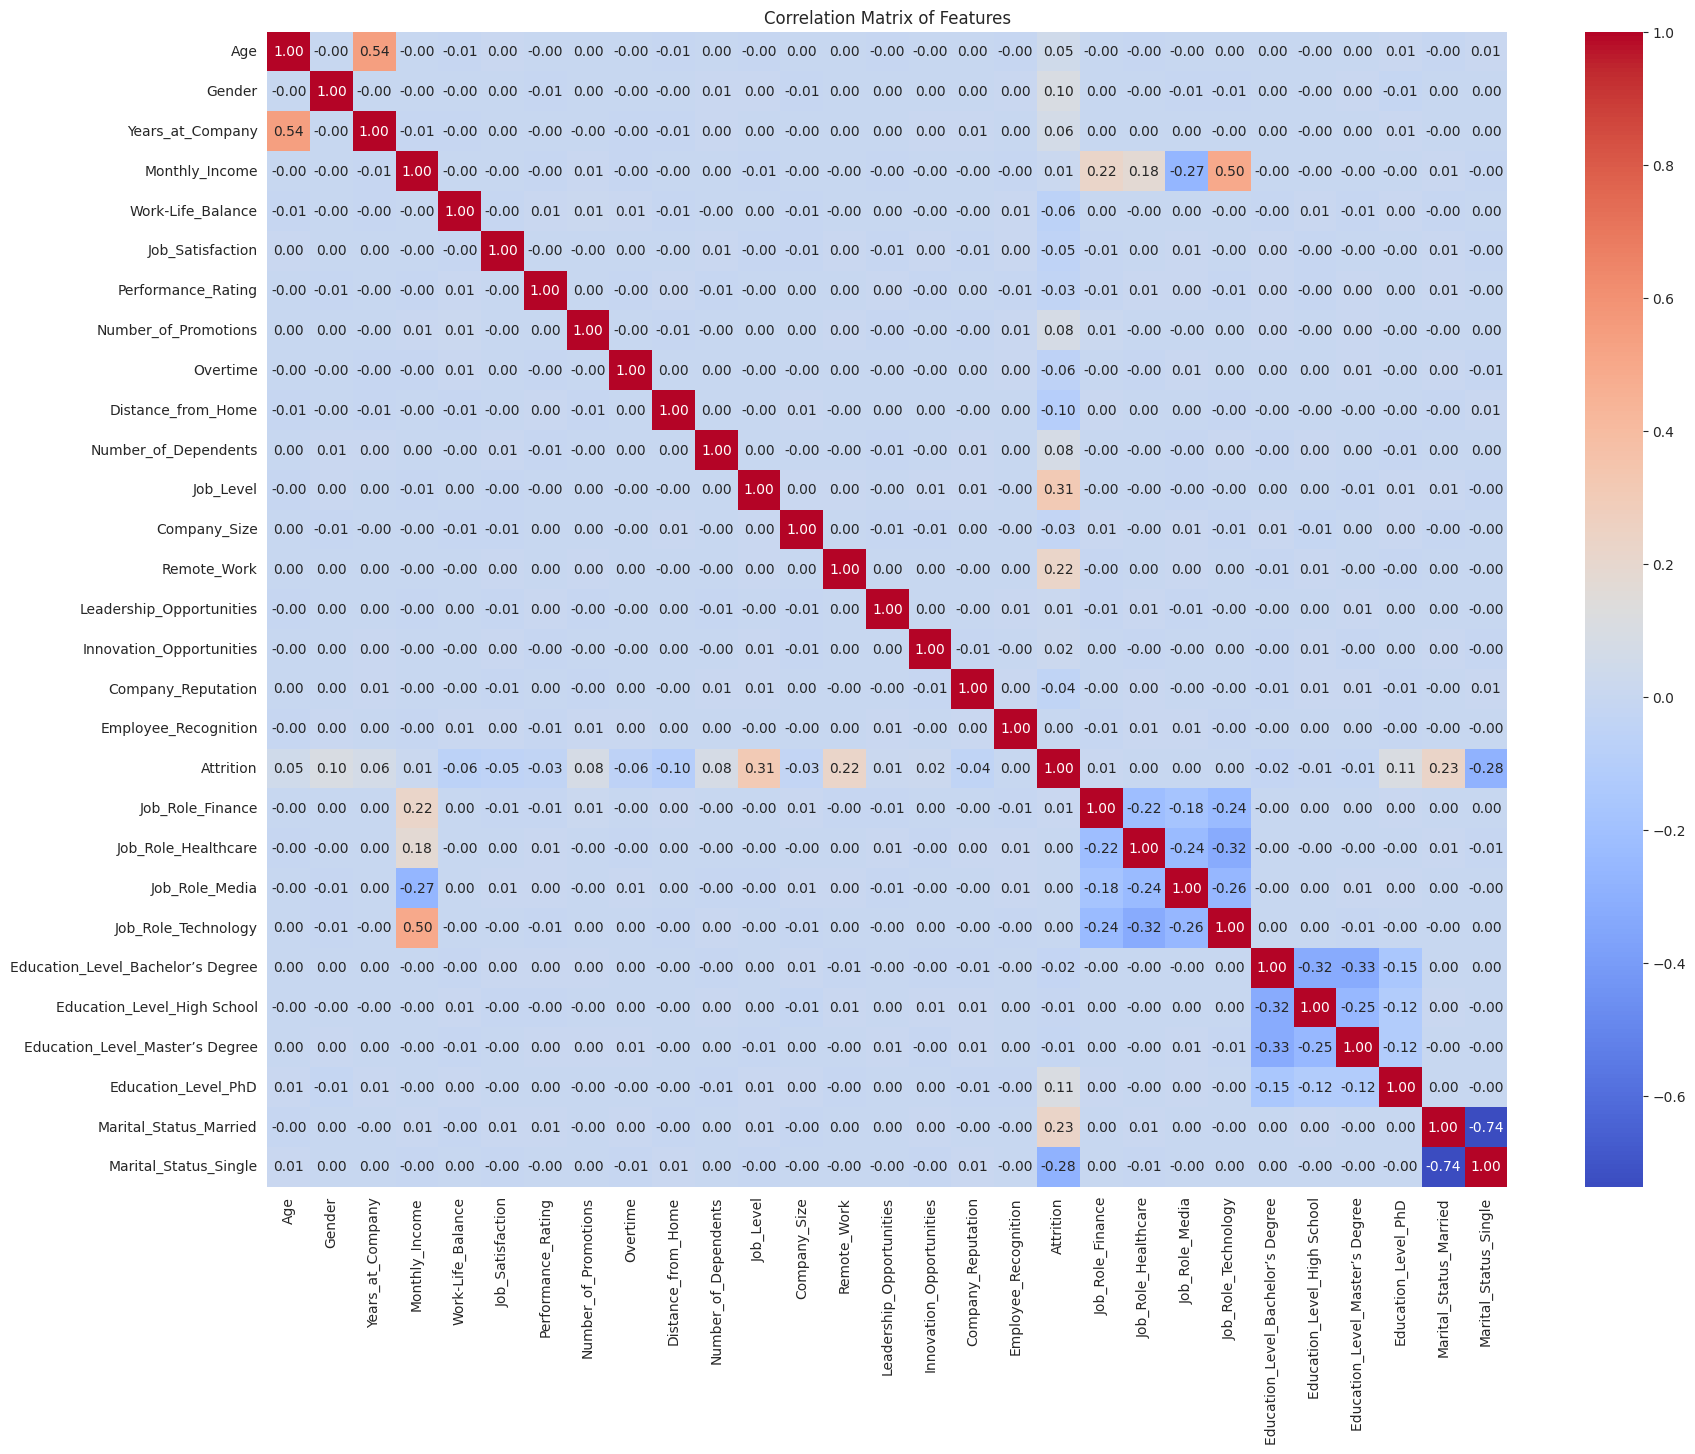

In [60]:

import matplotlib.pyplot as plt
import seaborn as sns


for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = train_df[col].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(20, 15))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Job Role in Finance and Attrition: There is a  negative correlation (-0.24) between being in a finance role and attrition, suggesting that employees in finance are less likely to leave, possibly due to better job satisfaction or higher barriers to exit compared to other fields.

A positive correlation (0.22) indicates that larger companies are more likely to offer remote working options, which might be due to their greater resources and more flexible work policies.



In [61]:


train_df.dtypes

,0
Age,float64
Gender,int64
Years_at_Company,float64
Monthly_Income,float64
Work-Life_Balance,int64
Job_Satisfaction,int64
Performance_Rating,int64
Number_of_Promotions,int64
Overtime,int64
Distance_from_Home,float64


In [62]:

for col in train_df.select_dtypes(include=['int']).columns:
    print(f'{col}: {train_df[col].unique()}')

Gender: [1 0]
Work-Life_Balance: [0 3 2 1]
Job_Satisfaction: [2 0 3 1]
Performance_Rating: [0 3 2 1]
Number_of_Promotions: [2 3 0 1 4]
Overtime: [0 1]
Number_of_Dependents: [0 3 2 4 1 5 6]
Job_Level: [1 2 0]
Company_Size: [1 2 0]
Remote_Work: [0 1]
Leadership_Opportunities: [0 1]
Innovation_Opportunities: [0 1]
Company_Reputation: [0 1 3 2]
Employee_Recognition: [2 1 0 3]
Attrition: [1 0]
Job_Role_Finance: [0 1]
Job_Role_Healthcare: [0 1]
Job_Role_Media: [0 1]
Job_Role_Technology: [0 1]
Education_Level_Bachelor’s Degree: [0 1]
Education_Level_High School: [0 1]
Education_Level_Master’s Degree: [0 1]
Education_Level_PhD: [0 1]
Marital_Status_Married: [1 0]
Marital_Status_Single: [0 1]


In [63]:
train_df.columns

Index(['Age', 'Gender', 'Years_at_Company', 'Monthly_Income',
       'Work-Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Number_of_Promotions', 'Overtime', 'Distance_from_Home',
       'Number_of_Dependents', 'Job_Level', 'Company_Size', 'Remote_Work',
       'Leadership_Opportunities', 'Innovation_Opportunities',
       'Company_Reputation', 'Employee_Recognition', 'Attrition',
       'Job_Role_Finance', 'Job_Role_Healthcare', 'Job_Role_Media',
       'Job_Role_Technology', 'Education_Level_Bachelor’s Degree',
       'Education_Level_High School', 'Education_Level_Master’s Degree',
       'Education_Level_PhD', 'Marital_Status_Married',
       'Marital_Status_Single'],
      dtype='object')

In [64]:

import statsmodels.api as sm

# Define your independent variables (features) and dependent variable (target)
X = train_df[['Age', 'Years_at_Company', 'Monthly_Income', 'Number_of_Promotions', 'Distance_from_Home', 'Number_of_Dependents']]
y = train_df['Attrition']  # Assuming 'Attrition' is your target variable

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_reg = sm.Logit(y, X)
results = logit_reg.fit()

# Print the model summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.678699
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                59598
Model:                          Logit   Df Residuals:                    59591
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                 0.01914
Time:                        21:38:21   Log-Likelihood:                -40449.
converged:                       True   LL-Null:                       -41239.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2070      0.014    -14.809      0.000      -0.234      -0.180

**Age (0.039):** Older employees are slightly more likely to stay, as indicated by a positive coefficient. Each additional year in age slightly decreases the likelihood of leaving.

**Years at Company (0.1109):** Longer tenure at the company significantly reduces the likelihood of attrition. Employees with more years at the company are more likely to stay.

**Monthly Income (0.0221):** Higher monthly income slightly increases the likelihood of staying. Each increase in income makes it less likely that an employee will leave.

**Number of Promotions (0.1657):** Employees who have received more promotions are much less likely to leave, suggesting that career advancement within the company is a strong factor in retention.

**Distance from Home (-0.1936):** Employees who live farther from work are more likely to leave. The negative coefficient indicates a strong relationship between longer commutes and higher attrition.

**Number of Dependents (0.1035):** Having more dependents slightly decreases the likelihood of attrition, suggesting that employees with family responsibilities might prioritize job stability.

# model


In [65]:
X1 = train_df.drop([ 'Attrition'], axis=1)
y1 = train_df['Attrition']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [67]:

print(X_train.columns)
print(y_train.unique())

Index(['Age', 'Gender', 'Years_at_Company', 'Monthly_Income',
       'Work-Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Number_of_Promotions', 'Overtime', 'Distance_from_Home',
       'Number_of_Dependents', 'Job_Level', 'Company_Size', 'Remote_Work',
       'Leadership_Opportunities', 'Innovation_Opportunities',
       'Company_Reputation', 'Employee_Recognition', 'Job_Role_Finance',
       'Job_Role_Healthcare', 'Job_Role_Media', 'Job_Role_Technology',
       'Education_Level_Bachelor’s Degree', 'Education_Level_High School',
       'Education_Level_Master’s Degree', 'Education_Level_PhD',
       'Marital_Status_Married', 'Marital_Status_Single'],
      dtype='object')
[1 0]


# KNN

In [68]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      5667
           1       0.68      0.67      0.68      6253

    accuracy                           0.66     11920
   macro avg       0.66      0.66      0.66     11920
weighted avg       0.67      0.66      0.66     11920



In [69]:

classificationSummary(y_test, y_pred)

Confusion Matrix (Accuracy 0.6648)

       Prediction
Actual    0    1
     0 3735 1932
     1 2064 4189


# decision tree

In [70]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the decision tree
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Adjust the range as needed
    'min_samples_split': [2, 5, 10],  # Adjust the range as needed
    'min_samples_leaf': [1, 2, 4]  # Adjust the range as needed
}

# Create a decision tree classifier
tree = DecisionTreeClassifier(random_state=42)  # Use a random state for reproducibility

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best estimator (decision tree with the best hyperparameters)
best_tree = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_tree.predict(X_test)

# Evaluate the best model
print("Best Decision Tree Model:")
classificationSummary(y_test, y_pred)



Best Decision Tree Model:
Confusion Matrix (Accuracy 0.7185)

       Prediction
Actual    0    1
     0 4263 1404
     1 1951 4302


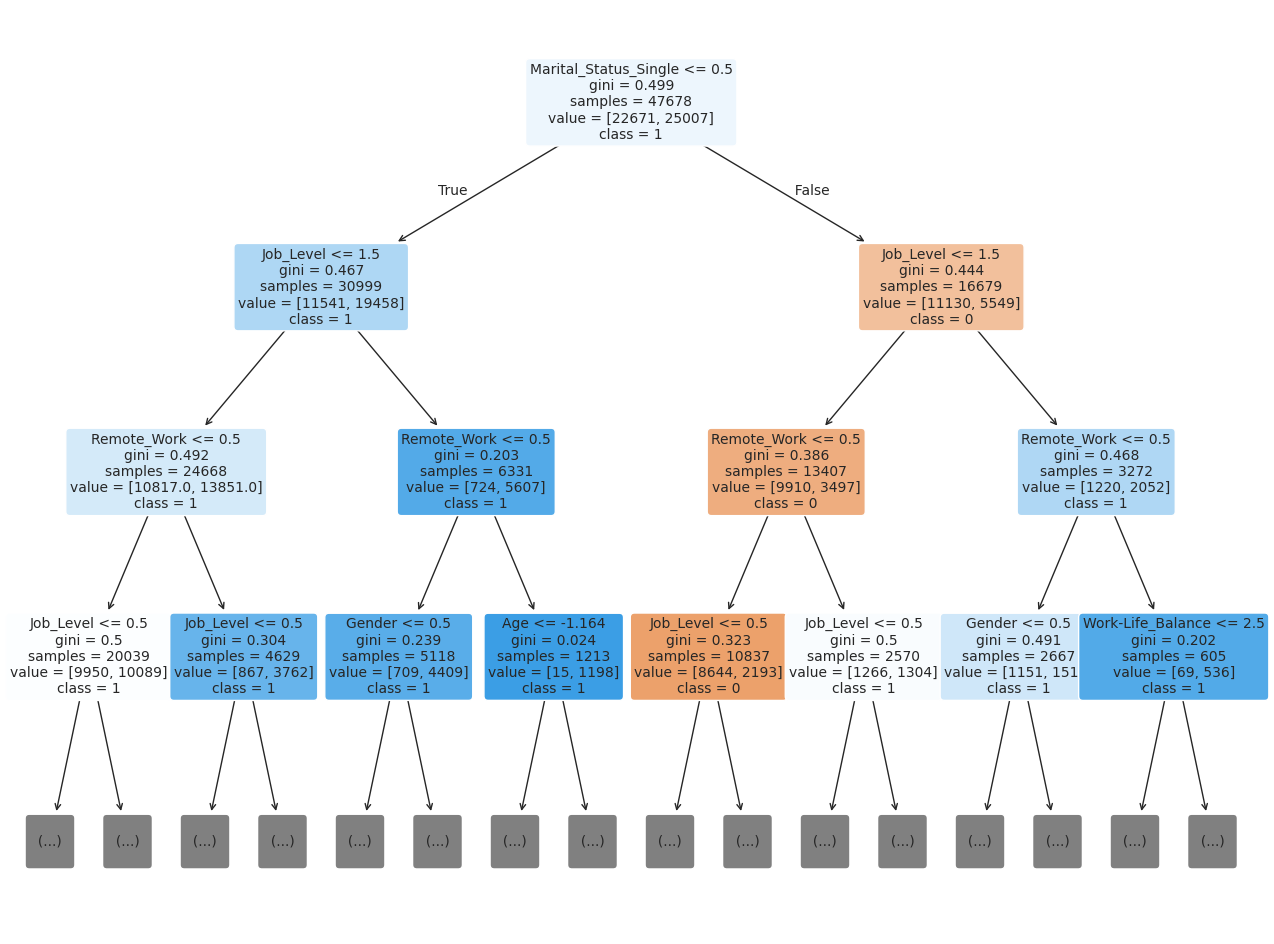

In [71]:
plt.figure(figsize=(16, 12))  # Bigger figure size for better visualization
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'],
          rounded=True, max_depth=3, fontsize=10, proportion=False)  # Customized visual parameters
plt.show()

**Rule 1:**Job Level and Remote Work Influence

If an employee's job level is less than or equal to 1.5 and they do not have the option to work remotely (Remote Work <= 0.5), they are more likely to stay at the company (class = 1), as shown by the larger proportion of the value = [10817.0, 136851.0].

**Rule 2:** Marital Status and Remote Work Influence

If an employee is not single (Marital_Status_Single <= 0.5) and has a job level over 1.5, but still lacks remote work options (Remote Work <= 0.5), there is a split outcome with a leaning towards leaving (class = 0), reflected in value = [9910, 3497].

**Rule 3:** Age and Job Level Influence

If an employee's job level is 1.5 or below, they are single, and their age is less than or equal to -1.164 , they are inclined to stay (class = 1), suggested by value = [15, 1198].

**Rule 4:** Work-Life Balance Influence

For an employee who is not single, has a higher job level (Job_Level > 1.5), and enjoys a high work-life balance (Work-Life_Balance > 2.5), the likelihood of staying at the company significantly increases (class = 1), shown by value = [69, 536].

**Rule 5:** Gender and Job Level Influence

Employees with a job level of 0.5 or below and who are female (Gender <= 0.5) tend to stay with the company (class = 1), with values represented by [709, 4409].

# Random forest

In [72]:


# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)


# Evaluate the model
print("Random Forest Model:")
classificationSummary(y_test, y_pred_rf)

Random Forest Model:
Confusion Matrix (Accuracy 0.7398)

       Prediction
Actual    0    1
     0 4146 1521
     1 1580 4673


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Random Forest Model with Best Parameters:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Model with Best Parameters:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      5667
           1       0.75      0.76      0.76      6253

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920

Accuracy: 0.7428691275167785
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [74]:
classificationSummary(y_test, y_pred)

Confusion Matrix (Accuracy 0.7429)

       Prediction
Actual    0    1
     0 4099 1568
     1 1497 4756


#Logistic regression

In [75]:
# logistic regression

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
classificationSummary(y_test, y_pred_logreg)

print(classification_report(y_test, y_pred_logreg))

Logistic Regression Model:
Confusion Matrix (Accuracy 0.7222)

       Prediction
Actual    0    1
     0 3978 1689
     1 1622 4631
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      5667
           1       0.73      0.74      0.74      6253

    accuracy                           0.72     11920
   macro avg       0.72      0.72      0.72     11920
weighted avg       0.72      0.72      0.72     11920



From a company's perspective, accurately predicting which employees are likely to leave (labeled as '0' for Left) is critical because losing a good employee can have significant repercussions for the business. Here’s why focusing on predicting '0' effectively is important in simple terms:

**Cost Implications:** Replacing an employee involves not just the financial costs of hiring and training a new person, but also the lost productivity while the new employee gets up to speed. If a company can predict which employees might leave, they can implement strategies to potentially retain them, thus saving on these costs.

**Loss of Expertise:** When an experienced employee leaves, they take their knowledge and expertise with them. This loss can be particularly damaging if the employee plays a key role in the organization or has unique skills that are not easily replaceable. Predicting who might leave allows the company to try and address their concerns or improve their job satisfaction to keep this expertise within the firm.

**Impact on Morale:** The departure of colleagues can affect the morale of the remaining team members, leading to reduced productivity and possibly triggering a higher turnover rate. Knowing in advance who might leave gives management a chance to mitigate these effects, either by improving the work environment or addressing broader concerns that affect employee satisfaction.


**Strategic Planning:** Predicting employee departures helps in workforce planning and management. It enables HR to maintain the right balance of skills and effectively plan for recruitment to avoid skill shortages.

**Model Performance Summary:**

**K-Nearest Neighbors (KNN)**

Precision for 'Left' (0): 0.64
Recall for 'Left' (0): 0.66
This model has moderate precision and recall but might not be reliable for critical HR decisions due to its overall lower performance metrics.

**Decision Tree**

Precision for 'Left' (0) (approx.): 0.69 (from confusion matrix)
Recall for 'Left' (0) (approx.): 0.75
The Decision Tree shows an improvement over KNN, particularly in recall, which is crucial for minimizing the risk of missing employees who might leave.

**Random Forest**

Precision for 'Left' (0): 0.73
Recall for 'Left' (0): 0.73
Random Forest improves upon both precision and recall across the board, indicating a balanced ability to identify leavers and stayers accurately.

**Optimized Random Forest**

Precision for 'Left' (0): 0.73
Recall for 'Left' (0): 0.73
With the best parameters applied, this model slightly enhances overall accuracy while maintaining strong precision and recall.

**Logistic Regression**

Precision for 'Left' (0): 0.71
Recall for 'Left' (0): 0.70
Logistic Regression offers competitive precision and recall but does not exceed the performance of the optimized Random Forest model.

**Observations and Recommendations:**

The Optimized Random Forest model stands out as the best choice for several reasons:
It shows the highest accuracy (74.28%), which means it generally makes the correct predictions more often than the other models.

The recall for predicting employees who leave (0) is among the highest at 0.73, tied with the standard Random Forest model. High recall is critical in this context because it means the model is effectively identifying most of the employees who are at risk of leaving, which is crucial for HR interventions.

Precision is also strong, ensuring that when the model predicts an employee will leave, it is likely to be correct, thus helping to target retention efforts efficiently.

**Conclusion**:

Choosing the right model to predict employee attrition is crucial due to the high costs and disruptions of replacing key staff. The **Optimized Random Forest model** is the best choice for its accuracy and customizable settings. It allows employers to effectively identify employees likely to leave, enabling proactive retention strategies that help reduce turnover and its related costs

In [77]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
feature_importances_df

,Feature,Importance
11,Job_Level,0.099511
9,Distance_from_Home,0.093211
3,Monthly_Income,0.090855
2,Years_at_Company,0.078782
0,Age,0.077888
27,Marital_Status_Single,0.056385
13,Remote_Work,0.049278
10,Number_of_Dependents,0.047135
4,Work-Life_Balance,0.045908
7,Number_of_Promotions,0.041078


In [81]:

import altair as alt

# Sort the dataframe by importance in descending order
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
chart = alt.Chart(feature_importances_df_sorted).mark_bar().encode(
    x='Importance',
    y=alt.Y('Feature', sort='-x')  # Sort y-axis based on x-axis values
)

chart


alt.Chart(...)

The feature importance list from the model helps us understand which factors most influence an employee's decision to stay at or leave a company. Here’s a simpler breakdown:

Job Level: This is the most important factor. It suggests that the higher an employee's position in the company, the less likely they are to leave.

Distance from Home: Employees who live farther from work are more likely to leave, indicating that a shorter commute is a strong factor in employee retention.

Monthly Income: Salary plays a crucial role; higher earnings generally mean an employee is less likely to leave.

Years at the Company and Age: Longer tenure and older age both decrease the likelihood of an employee leaving, pointing to loyalty and job satisfaction in more established employees.

Marital Status (Single): Single employees are more likely to leave than those who are married, possibly because they have fewer family commitments tying them to one location.

Remote Work: The ability to work remotely is important, showing that flexibility in work location can help retain employees.

Number of Dependents and Work-Life Balance: Employees with dependents and those who value work-life balance are considerations that affect whether someone stays or leaves. Better balance and support for personal commitments can help retain staff.

In [82]:

selected_features = feature_importances_df['Feature'][:20].tolist()
print(selected_features)

X1_selected = train_df[selected_features]
y1 = train_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X1_selected, y1, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Random Forest Model with Best Parameters and Selected Features:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best parameters found: ", grid_search.best_params_)

['Job_Level', 'Distance_from_Home', 'Monthly_Income', 'Years_at_Company', 'Age', 'Marital_Status_Single', 'Remote_Work', 'Number_of_Dependents', 'Work-Life_Balance', 'Number_of_Promotions', 'Company_Reputation', 'Employee_Recognition', 'Job_Satisfaction', 'Performance_Rating', 'Marital_Status_Married', 'Company_Size', 'Gender', 'Overtime', 'Education_Level_Bachelor’s Degree', 'Job_Role_Healthcare']
Random Forest Model with Best Parameters and Selected Features:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5667
           1       0.75      0.75      0.75      6253

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920

Accuracy: 0.7384228187919463
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
